### Hyperbolic Tangent and Sigmoid (Logistic) Activation Function

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### Generating Data
There are four data with xor operations

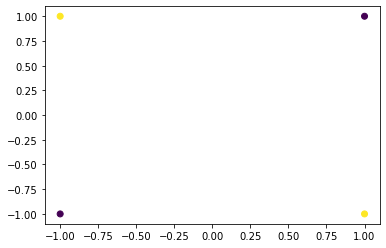

In [2]:
X = np.array([
    [1, 1],
    [-1, 1],
    [-1, -1],
    [1, -1]
])

y = np.array([
    -1,
    1,
    -1,
    1
])

# Plotting the four data
plt.scatter(X[:,0], X[:,1], c=y, marker='o')
plt.show()

## Calculating the Final Output  and Showing the Decision Surfaces 

### Outputs of Hyperbolic Tangent Activation Function

Hyperbolic tangent activation function has range between -1 and 1.

W1 = [0.9, 1, 1]
     [-1,  1, 1]
     
W2 = [-0.9, 1.3, -1.3]

~ For each point [x1, x2]

      X = [1, x1, x2]
      - In each neuron of hiddedn layer which has two neurons
        For n in 2
          z = W1[n].T.X
          yhat = tanh(z)
       - keep y value of each neuron of hidden layer to use in output layer as inputs like x1 and x2
       - In last neuron of output layer (which has one neuron)
         X2 = [1, y1, y2]
         z = w2.T.X2
         output = tanh(z)

In [3]:
# Adding ones of column to initial X 
tanh_X = np.c_[np.ones((4, 1)), X]


# Defining the initial weights
# tanh_weights1 for hidden layer which has two neurons
    #           [bias(w0), w1, w2]
    # [neuron1]
    # [neuron2]
tanh_weights1 = np.array([
    [0.9,1,1],
    [-1,1,1]
])
# tanh_weights2 for output layer which has one neuron
    #           [bias(w0), w1, w2]
    # [neuron1]
tanh_weights2 = np.array([-0.9,1.3,-1.3])



# tanh_H function calculates the tanh value of x
def tanh_H(x):
    t=np.tanh(x) #(np.exp(x)-np.exp(-1*x))/(np.exp(x)+np.exp(-1*x))
    return t



# tanh_check function checks y values 
def tanh_check(y):
    if (y<0):
        return -1
    else:
        return 1



# Calculating the final outputs of the initial four data with tanh
tanh_outputs = []
for row in range(4):
    
    # Hidden layer with two neurons
    hidden_y = []
    for neuron in range(2):
        z = tanh_X[row].dot(tanh_weights1[neuron].T)
        y_hat = tanh_H(z)
        hidden_y.append(tanh_check(y_hat))
        
    # Output layer with one neuron
    tanh_X2 = np.c_[np.ones((1, 1)), np.array(hidden_y).reshape(1, 2)] # X2 = [1, y1, y2]
    z = tanh_X2.dot(tanh_weights2.T)
    output_y = tanh_H(z)
    
    tanh_outputs.append(tanh_check(output_y))

    
print("Initial Outputs: ",y)
print("Final Outputs of tanh: ",tanh_outputs)

Initial Outputs:  [-1  1 -1  1]
Final Outputs of tanh:  [-1, 1, -1, 1]


### Decision Surfaces of Hyperbolic Tangent Activation Function

In [4]:
# Defining arrays
tanh_z = []         # for calculated z values (in the neuron of the output layer)
tanh_y1 = []        # for calculated y1 values (in the first neuron of the hidden layer)
tanh_y2 = []        # for calculated y2 values (in the second neuron of the hidden layer)
testX1 = []         # for tested x1 values
testX2 = []         # for tested x2 values

# Defining x1 and x2 values
for x1 in np.arange(-1, 1.1, 0.1):
    for x2 in np.arange(-1, 1.1, 0.1):
        X = np.array([1, x1, x2])
        testX1.append(x1)
        testX2.append(x2)
        
        # Hidden layer with two neurons
        hidden_y = []
        for neuron in range(2):
            z = X.dot(tanh_weights1[neuron].T)
            y_hat = tanh_H(z)
            hidden_y.append(tanh_check(y_hat))
           
        # Adding the values of the hidden layer to the arrays
        tanh_y1.append(hidden_y[0])
        tanh_y2.append(hidden_y[1])
        
        # Output layer with one neuron
        X2 = np.c_[np.ones((1, 1)), np.array(hidden_y).reshape(1, 2)] # X2 = [1, y1, y2]
        z = X2.dot(tanh_weights2.T)
        output_y = tanh_H(z)
        
        tanh_z.append(tanh_check(output_y))
        

len(testX1), len(testX2), len(tanh_z)

(441, 441, 441)

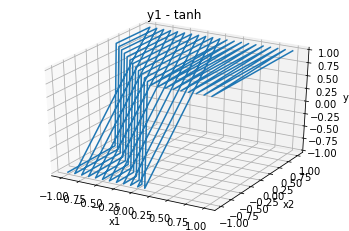

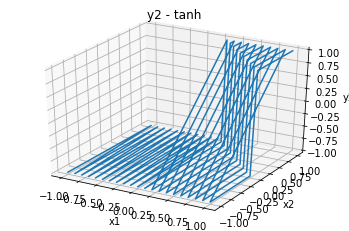

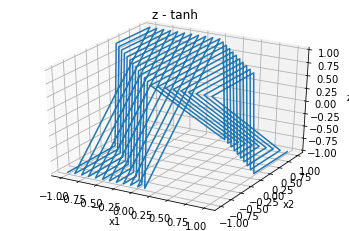

In [5]:
## Plotting y1 lines of tanh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(testX1, testX2, tanh_y1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y1')
ax.set_title('y1 - tanh')
plt.show()


## Plotting y2 lines of tanh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(testX1, testX2, tanh_y2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y2')
ax.set_title('y2 - tanh')
plt.show()


## Plotting z lines of tanh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(testX1, testX2, tanh_z)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
ax.set_title('z - tanh')
plt.show()

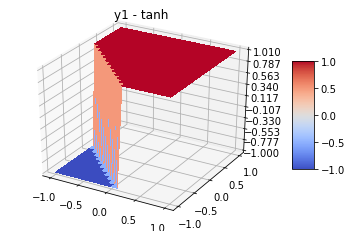

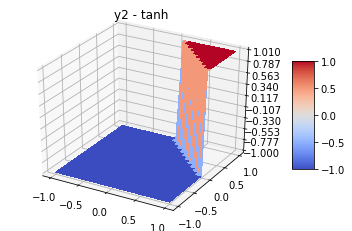

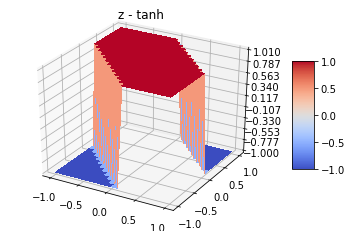

In [6]:
##
testX1 = np.arange(-1.0, 1.1, 0.1)        #testX1 = (np.array(testX1)).reshape(21, 21)
testX2 = np.arange(-1.0, 1.1, 0.1)        #testX2 = (np.array(testX2)).reshape(21, 21)
testX1,testX2 = np.meshgrid(testX1, testX2)



## Plotting y1 surface of tanh
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('y1 - tanh')

tanh_y1 = (np.array(tanh_y1)).reshape(testX1.shape[0], testX1.shape[1])

surf = ax.plot_surface(testX1, testX2, tanh_y1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


## Plotting y2 surface of tanh
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('y2 - tanh')

tanh_y2 = (np.array(tanh_y2)).reshape(testX1.shape[0], testX1.shape[1])

surf = ax.plot_surface(testX1, testX2, tanh_y2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



## Plotting z surface of tanh
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('z - tanh')

tanh_z = (np.array(tanh_z)).reshape(testX1.shape[0], testX1.shape[1])

surf = ax.plot_surface(testX1, testX2, tanh_z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Outputs of Sigmoid (Logistic) Activation Function

Sigmoid (logistic) activation function has range between 0 and 1.

W1 = [ 0, 1, 1]
     [-1, 1, 1]
     
W2 = [-1.3, 1.7, -2.1]

~ For each point [x1, x2]

      X = [1, x1, x2]
      - In each neuron of hiddedn layer which has two neurons
        For n in 2
          z = W1[n].T.X
          yhat = sigmoid(z)
       - keep y value of each neuron of hidden layer to use in output layer as inputs like x1 and x2
       - In last neuron of output layer (which has one neuron)
         X2 = [1, y1, y2]
         z = w2.T.X2
         output = sigmoid(z)

In [7]:
sigmoid_X = tanh_X #np.c_[np.ones((4, 1)), X]
y[np.where(y == -1)] = 0


# Defining the initial weights
# sigmoid_weights1 for hidden layer which has two neurons
    #           [bias(w0), w1, w2]
    # [neuron1]
    # [neuron2]
sigmoid_weights1 = np.array([
    [0,1,1],
    [-1,1,1]
])
# sigmoid_weights2 for output layer which has one neuron
    #           [bias(w0), w1, w2]
    # [neuron1]
sigmoid_weights2 = np.array([-1.3,1.7,-2.1])



# sigmoid_H function calculates the tanh value of x
def sigmoid_H(x):
    s=1/(1+np.exp(-1*x))
    return s



# sigmoid_check function checks y values 
def sigmoid_check(y):
    if (y<0.5):
        return 0
    else:
        return 1



# Calculating the final outputs of the initial four data with tanh
sigmoid_outputs = []
for row in range(4):
    
    # Hidden layer with two neurons
    hidden_y = []
    for neuron in range(2):
        z = sigmoid_X[row].dot(sigmoid_weights1[neuron].T)
        y_hat = sigmoid_H(z)
        hidden_y.append(sigmoid_check(y_hat))
        
    # Output layer with one neuron
    sigmoid_X2 = np.c_[np.ones((1, 1)), np.array(hidden_y).reshape(1, 2)] # X2 = [1, y1, y2]
    z = sigmoid_X2.dot(sigmoid_weights2.T)
    output_y = sigmoid_H(z)
    
    sigmoid_outputs.append(sigmoid_check(output_y))
    
    
print("Initial Outputs: ",y)
print("Final Outputs of sigmoid: ",sigmoid_outputs)

Initial Outputs:  [0 1 0 1]
Final Outputs of sigmoid:  [0, 1, 0, 1]


### Decision Surfaces of Sigmoid (Logistic) Activation Function

In [8]:
# Defining arrays
sigmoid_z = []         # for calculated z values (in the neuron of the output layer)
sigmoid_y1 = []        # for calculated y1 values (in the first neuron of the hidden layer)
sigmoid_y2 = []        # for calculated y2 values (in the second neuron of the hidden layer)
testX1 = []         # for tested x1 values
testX2 = []         # for tested x2 values

# Defining x1 and x2 values
for x1 in np.arange(0, 1.1, 0.1):
    for x2 in np.arange(0, 1.1, 0.1):
        X = np.array([1, x1, x2])
        testX1.append(x1)
        testX2.append(x2)
        
        # Hidden layer with two neurons
        hidden_y = []
        for neuron in range(2):
            z = X.dot(sigmoid_weights1[neuron].T)
            y_hat = sigmoid_H(z)
            hidden_y.append(sigmoid_check(y_hat))
           
        # Adding the values of the hidden layer to the arrays
        sigmoid_y1.append(hidden_y[0])
        sigmoid_y2.append(hidden_y[1])
        
        # Output layer with one neuron
        X2 = np.c_[np.ones((1, 1)), np.array(hidden_y).reshape(1, 2)] # X2 = [1, y1, y2]
        z = X2.dot(sigmoid_weights2.T)
        output_y = sigmoid_H(z)
        
        sigmoid_z.append(sigmoid_check(output_y))
        
len(testX1), len(testX2), len(sigmoid_z)

(121, 121, 121)

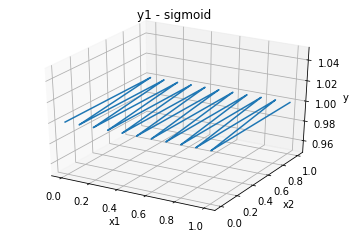

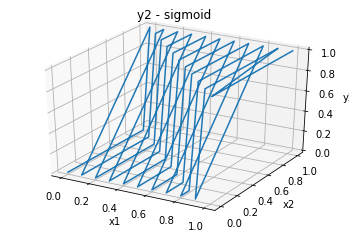

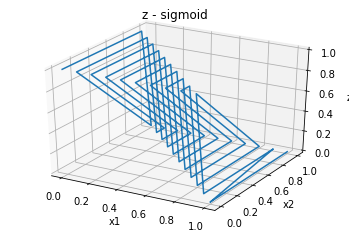

In [9]:
## Plotting y1 lines of sigmoid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(testX1, testX2, sigmoid_y1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y1')
ax.set_title('y1 - sigmoid')
plt.show()


## Plotting y2 lines of sigmoid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(testX1, testX2, sigmoid_y2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y2')
ax.set_title('y2 - sigmoid')
plt.show()


## Plotting z lines of sigmoid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(testX1, testX2, sigmoid_z)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
ax.set_title('z - sigmoid')
plt.show()

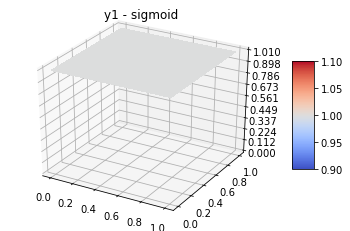

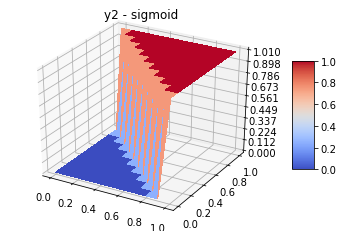

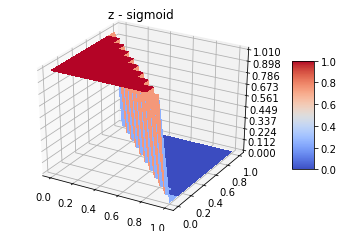

In [10]:
##
testX1 = np.arange(0, 1.1, 0.1)           #testX1 = (np.array(testX1)).reshape(11, 11)
testX2 = np.arange(0, 1.1, 0.1)           #testX2 = (np.array(testX2)).reshape(11, 11)
testX1,testX2 = np.meshgrid(testX1, testX2)


## PLotting y1 surface of sigmoid
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('y1 - sigmoid')

sigmoid_y1 = (np.array(sigmoid_y1)).reshape(testX1.shape[0], testX1.shape[1])

surf = ax.plot_surface(testX1, testX2, sigmoid_y1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(0.0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



## Plotting y2 surface of sigmoid
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('y2 - sigmoid')

sigmoid_y2 = (np.array(sigmoid_y2)).reshape(testX1.shape[0], testX1.shape[1])

surf = ax.plot_surface(testX1, testX2, sigmoid_y2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(0.0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



## Plotting z surface of sigmoid
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('z - sigmoid')

sigmoid_z = (np.array(sigmoid_z)).reshape(testX1.shape[0], testX1.shape[1])

surf = ax.plot_surface(testX1, testX2, sigmoid_z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(0.0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()